# Exploring the Influence of Social Life on Academics


### Silvia Camara, Brenna Leahy, Maria Gund


Our project will be based on a dataset from Kaggle that explores the effect of socioeconomic factors on students grades from a survey of students’ math and portuguese language courses in secondary school. The dataset contains data gathered from Portuguese students who were surveyed on several different aspects of their life, including familial and social relations as well as their academic habits and socio-economic status.We plan to use the data set to predict a student's final grade in a class based on different social factors, including the amount of time he or she spends going out with friends, the quality of their family relationships, whether they take part in after-school activities, as well as the size of their family. Using several features, we want to see if there is a correlation between a student's social life and their grades. We also want to see if there is one specific feature (or a combination of features) that better predicts whether a student's grade will be above average, average, or below average. 

We plan to explore this topic by using principal component analysis to determine which parts of the data are most useful as well as Naive Bayes to present the data comprehensively and analyze it.


In [47]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, datasets


# Read the file into a DataFrame.
math_data = pd.read_csv("student-mat.csv")
port_data = pd.read_csv("student-por.csv")
#data = data.fillna(0)
#data = data.dropna()

In [42]:
# We need to fix what numbers go in the arrays to match our number of features and class

X_math = math_data.iloc[:, :-1]  # features
Y_math = math_data.iloc[:, -1]  # class

X_port = port_data.iloc[:, :2]  # features
Y_port = port_data.iloc[:, -1]  # class

print(X_math.head())
print()
print(Y_math.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        6   5   6  
1       no      5         3      3     1    1      3        4   5   5  
2       no      4         3      2     2    3      3       10   7   8  
3      yes      3         2      2     1    1      5        2  15  14  
4       no      4         3      2     1    2      5        4   6  10  

[5 rows x 32 columns]

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64


## Math Data Set

In [43]:
# Output the first few rows of the math dataset.
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Portuguese Data Set

In [44]:
# Output the first few rows of the portuguese dataset.
port_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Pretty sure I'm doing this wrong

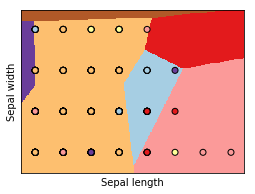

In [55]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_math, Y_math)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_math.iloc[:, 0].min() - .5, X_math.iloc[:, 0].max() + .5
y_min, y_max = X_math.iloc[:, 1].min() - .5, X_math.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=Y_math, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc      ...       activities_no  activities_yes  nursery_no  nursery_yes  \
0     1      ...                   1               0           0            1   
1     1      ...                   1               0           1            0   
2     2      ...                   1               0           0            1   
3     1      ...                   0               1           0            1   
4     1      ...                   1               0           0            1   

   higher_no  higher_yes  intern

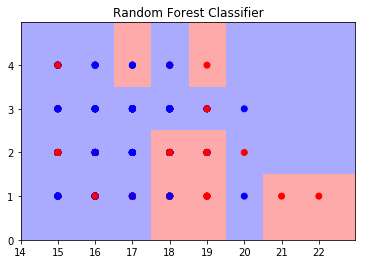

In [45]:
h = .02  # step size in the mesh

X_math = pd.get_dummies(X_math)
print(X_math.head())
X_math = X_math.iloc[:, [0,4]] #create classifier using age and study time
math_rfc = RandomForestClassifier(max_depth=4)
math_rfc.fit(X_math, Y_math)
print(X_math.head())

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_math.iloc[:, 0].min() - 1, X_math.iloc[:, 0].max() + 1
y_min, y_max = X_math.iloc[:, 1].min() - 1, X_math.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = math_rfc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=Y_math, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Random Forest Classifier")